In [174]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


0.9999996829318346


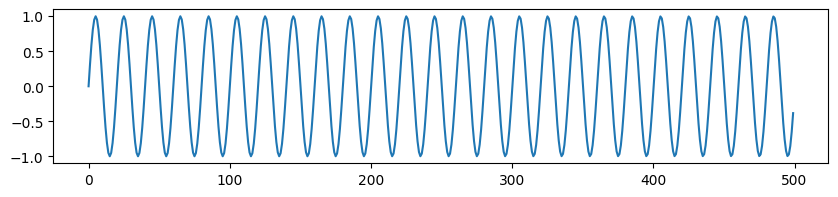

In [175]:
# define input sequence
import math
# import random

w = 0.314
t = np.arange(0, 500)
q =  np.sin(w*t)    # + np.random.rand(100)
print(math.sin(w*5))
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2))
plt.plot(t,q)

In [176]:
np.random.rand(10)

array([0.01490249, 0.97101101, 0.89627335, 0.19138031, 0.87200633,
       0.88791251, 0.18826109, 0.07651545, 0.90170946, 0.33789588])

In [177]:

# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


In [232]:


timeseries_data = q[:50]
# choose a number of time steps
n_steps = 10
# split into samples
X, y = prepare_data(timeseries_data, n_steps)
# print(X),print(y)

In [233]:
X.shape

(40, 10)

In [234]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [235]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)

In [236]:
# demonstrate prediction for next 10 days
x_input =  q[40:51]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<450):

    if(len(temp_input)>3):
        x_input= np.array(temp_input[1:])
        print("{} step input {}".format(i,x_input))
        # print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} step output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

0 step input [0.30280017 0.58236051 0.80497266 0.94886769 0.99997432 0.9532949
 0.81339414 0.59395274 0.31642956 0.00796318]
0 step output [[-0.299003]]
1 step input [ 0.58236051  0.80497266  0.94886769  0.99997432  0.9532949   0.81339414
  0.59395274  0.31642956  0.00796318 -0.29900301]
1 step output [[-0.577709]]
2 step input [ 0.80497266  0.94886769  0.99997432  0.9532949   0.81339414  0.59395274
  0.31642956  0.00796318 -0.29900301 -0.57770902]
2 step output [[-0.8064698]]
3 step input [ 0.94886769  0.99997432  0.9532949   0.81339414  0.59395274  0.31642956
  0.00796318 -0.29900301 -0.57770902 -0.8064698 ]
3 step output [[-0.9514499]]
4 step input [ 0.99997432  0.9532949   0.81339414  0.59395274  0.31642956  0.00796318
 -0.29900301 -0.57770902 -0.8064698  -0.95144987]
4 step output [[-0.9986873]]
5 step input [ 0.9532949   0.81339414  0.59395274  0.31642956  0.00796318 -0.29900301
 -0.57770902 -0.8064698  -0.95144987 -0.99868733]
5 step output [[-0.95386094]]
6 step input [ 0.81339

In [237]:
timeseries_data


array([ 0.        ,  0.30886552,  0.58752753,  0.80873606,  0.95085946,
        0.99999968,  0.95135138,  0.80967179,  0.58881556,  0.31037991,
        0.00159265, -0.30735035, -0.586238  , -0.80779828, -0.95036513,
       -0.99999715, -0.95184088, -0.81060546, -0.5901021 , -0.31189351,
       -0.0031853 ,  0.30583439,  0.58494699,  0.80685845,  0.94986839,
        0.99999207,  0.95232797,  0.81153708,  0.59138715,  0.31340632,
        0.00477794, -0.30431767, -0.58365449, -0.80591658, -0.94936925,
       -0.99998446, -0.95281264, -0.81246664, -0.5926707 , -0.31491834,
       -0.00637057,  0.30280017,  0.58236051,  0.80497266,  0.94886769,
        0.99997432,  0.9532949 ,  0.81339414,  0.59395274,  0.31642956])

In [238]:
lst_output

[-0.299003,
 -0.577709,
 -0.8064698,
 -0.9514499,
 -0.9986873,
 -0.95386094,
 -0.8153205,
 -0.5972172,
 -0.32146287,
 -0.006084025,
 0.2939973,
 0.5733008,
 0.8039266,
 0.94836736,
 0.9971085,
 0.952446,
 0.8172032,
 0.6001943,
 0.3215692,
 0.008616937,
 -0.2933353,
 -0.5726827,
 -0.8036168,
 -0.9494445,
 -0.99768746,
 -0.95492435,
 -0.8182563,
 -0.6009142,
 -0.32507274,
 -0.009752877,
 0.28922525,
 0.5690773,
 0.8007616,
 0.9464963,
 0.99657303,
 0.9533432,
 0.81923175,
 0.6034797,
 0.32504448,
 0.012491345,
 -0.2892682,
 -0.5686735,
 -0.8005866,
 -0.9476722,
 -0.9971258,
 -0.9556187,
 -0.820324,
 -0.6039523,
 -0.32868746,
 -0.013829969,
 0.28520072,
 0.56522447,
 0.79769653,
 0.9446871,
 0.9959356,
 0.9539012,
 0.8209306,
 0.60647726,
 0.32834393,
 0.016184736,
 -0.28556743,
 -0.5648679,
 -0.79762036,
 -0.9458524,
 -0.9964319,
 -0.95608574,
 -0.82214934,
 -0.6067198,
 -0.332036,
 -0.017618127,
 0.28145358,
 0.5615415,
 0.7946885,
 0.9428241,
 0.99516445,
 0.9542627,
 0.82247096,
 0.6

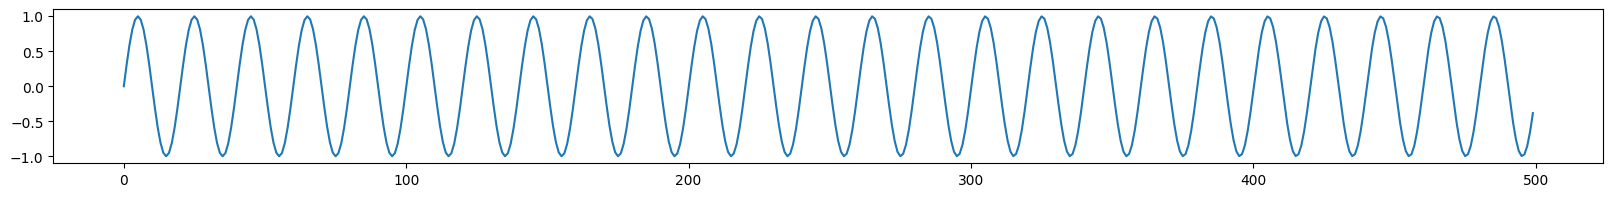

In [239]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 2))
plt.plot(t,q)


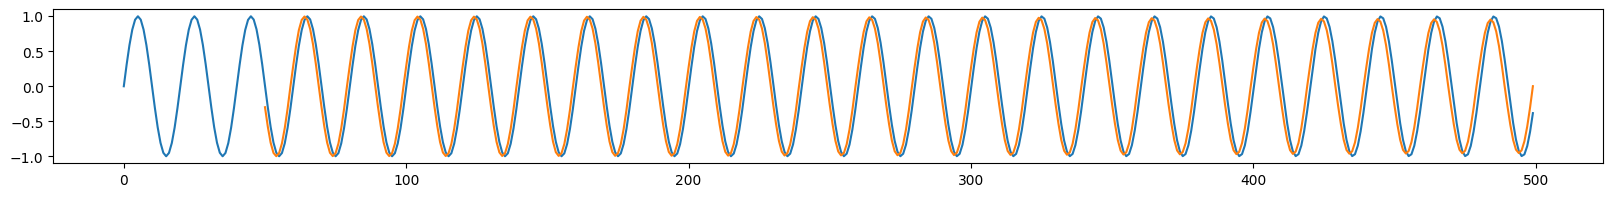

In [240]:
import matplotlib.pyplot as plt
# day_new=np.arange(1,10)
time=np.arange(50,500)
# plt.plot(day_new,timeseries_data)
plt.figure(figsize=(20, 2))
plt.plot(t,q)
plt.plot(time,lst_output)

In [241]:
import jax